In [1]:
import pandas as pd
import numpy as np
import time
import pandas as ps
import pandasql as ps
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
df_l = pd.read_csv('C:\\Users\\NazUremek\\Documents\\Test\\Disney_lifetime.csv', delimiter=',', encoding='utf8')
df_l.head(10)

,subscription_source_ref,swid,sub_random,swid_random,platform,cohort,sku,product_name,signup_date,expiration_date,...,monthy_active_user_flag,monthly_minutes_watched,monthly_streams_watched,weekly_active_user_flag,weekly_minutes_watched,weekly_streams_watched,daily_active_user_flag,daily_minutes_watched,daily_streams_watched,updated_as_of
0,GPA.3399-2979-7501-78822,{DF15AAE1-2CB8-40AA-95AA-E12CB8B0AAC5},154,83.0,GOOGLE,ESPN+,com.espn.monthly.espnplus7dft.google,Google ESPN Plus Base Monthly with 7 Day Free ...,10/1/2018,11/1/2018,...,0,0.000000,0,0,0.000000,0,0,0.0,0,1/7/2019
1,8dbU-lRTp1n1pyZ4N80o6KECfofVM9poSPpZufKObAg=:3:11,{028C1922-3F6B-4882-B6E2-FF07A85B41C7},215,103.0,AMAZON,ESPN+,com.espn.monthly.espnplus7dft.tv.amazon,FireTV ESPN Plus Monthly Base with 7 Day Free ...,10/1/2018,1/8/2019,...,1,67.132231,5,1,61.194965,4,0,0.0,0,1/7/2019
2,GPA.3399-1492-8169-67142,{BE9EDC52-A413-4478-9F6B-B2F02ADA15E0},113,69.0,GOOGLE,ESPN+,com.espn.monthly.espnplus7dft.google,Google ESPN Plus Base Monthly with 7 Day Free ...,10/1/2018,10/8/2018,...,0,0.000000,0,0,0.000000,0,0,0.0,0,1/7/2019
3,W2YyEJR15dXBTyqSlRjV6gdD7KEPrS4cnHAjswLSnUk=:3:11,{E350D4F4-E2DE-459A-B0C0-B6618A554AC3},255,230.0,AMAZON,ESPN+,com.espn.monthly.espnplus7dft.tv.amazon,FireTV ESPN Plus Monthly Base with 7 Day Free ...,10/1/2018,1/8/2019,...,0,0.000000,0,0,0.000000,0,0,0.0,0,1/7/2019
4,1.90001E+14,{CC6E6415-7670-46D5-AE64-157670B6D517},97,198.0,APPLE,ESPN+,com.espn.monthly.espnplus7dft.apple,Apple ESPN Plus Base Monthly with 7 Day Free T...,10/1/2018,1/8/2019,...,0,0.000000,0,0,0.000000,0,0,0.0,0,1/7/2019
5,GPA.3366-6437-8501-27819,{02D6F77A-1A0A-40C0-A030-70D4D9456347},168,107.0,GOOGLE,ESPN+,com.espn.monthly.espnplus7dft.google,Google ESPN Plus Base Monthly with 7 Day Free ...,10/1/2018,11/1/2018,...,0,0.000000,0,0,0.000000,0,0,0.0,0,1/7/2019
6,4.6E+14,NaN,254,NaN,APPLE,ESPN+,com.espn.monthly.espnplus7dft.apple,Apple ESPN Plus Base Monthly with 7 Day Free T...,10/1/2018,11/12/2018,...,0,0.000000,0,0,0.000000,0,0,0.0,0,1/7/2019
7,cQRAHM5HLIppR8wCucoB2eCockNiEYEw4f_nx6Tsemw=:3:11,NaN,166,NaN,AMAZON,ESPN+,com.espn.monthly.espnplus7dft.tv.amazon,FireTV ESPN Plus Monthly Base with 7 Day Free ...,10/1/2018,10/14/2018,...,0,0.000000,0,0,0.000000,0,0,0.0,0,1/7/2019
8,0ES4O-8YjmjMjNRfMOOq4P9b0IHZ_O4cipA4DkZLf0s=:3:11,NaN,235,NaN,AMAZON,ESPN+,com.espn.monthly.espnplus7dft.tv.amazon,FireTV ESPN Plus Monthly Base with 7 Day Free ...,10/1/2018,10/8/2018,...,0,0.000000,0,0,0.000000,0,0,0.0,0,1/7/2019
9,5.7E+14,NaN,221,NaN,APPLE,ESPN+,com.espn.monthly.espnplus7dft.apple,Apple ESPN Plus Base Monthly with 7 Day Free T...,10/1/2018,10/8/2018,...,0,0.000000,0,0,0.000000,0,0,0.0,0,1/7/2019


In [4]:
df_m = pd.read_csv('C:\\Users\\NazUremek\\Documents\\Test\\media_meta_data.csv', delimiter=',', encoding='utf8')
df_m.head(10)

,mediaid,contentid,partnerairingid,type,programtype,runtime,channel_id,mediaconfig_state,mediaconfig_producttype,livebroadcast,...,sport,titleepisodename,hometeamid,awayteamid,hometeamname,awayteamname,gamedescription,gamedate_est,teams,contentsource
0,14843b3c-eb30-46bb-99e1-7b5e03c2cb5f,a4dc0728-d2fa-4caa-911c-a363b34d3886,ESPN:a110950914,Airing,sports,2:00:00,ea98cb68-1b74-11e8-9c0c-12079456feac,OFF,LIVE,True,...,Soccer,Saint Louis vs. UMass (W Soccer),NaN,NaN,NaN,NaN,NaN,00:00.0,NaN,espn
1,2018305a-1d97-4b9e-be31-760eae45e9bb,05789b06-e36d-4353-9d45-fefb7ac04d80,ESPN:a111029615,Airing,sports,2:10:00,ea98cb68-1b74-11e8-9c0c-12079456feac,ON,VOD,True,...,Soccer,Cagliari vs. Bologna (Serie A),NaN,NaN,Bologna,Cagliari,2018-10-06 Cagliari vs. Bologna,50:00.0,NaN,espn
2,2100c9c9-dd24-4327-a4de-187ffee4d40d,cdec37a3-080f-4c19-b8a0-aa2f521d9e13,ESPN:a110992589,Airing,sports,6:30:00,ea98cb68-1b74-11e8-9c0c-12079456feac,OFF,LIVE,True,...,Tennis,ITA Northeast Regionals (Court 4),NaN,NaN,NaN,NaN,NaN,00:00.0,NaN,espn
3,26747903-530c-4383-9760-a71b579501ae,3e7755b6-c1fa-4535-b13b-02df42285c13,ESPN:a110950343,Airing,sports,2:00:00,ea98cb68-1b74-11e8-9c0c-12079456feac,OFF,LIVE,True,...,Soccer,Saint Joseph's vs. George Mason (M Soccer),NaN,NaN,NaN,NaN,NaN,00:00.0,NaN,espn
4,29c221cf-8c16-42c0-ae67-4161b71bf1ee,88173b00-bb10-4d06-83cc-830ad148f26b,ESPN:a111019728,Airing,sports,0:25:00,ea98cb68-1b74-11e8-9c0c-12079456feac,ON,VOD,True,...,Boxing,"Tue, 10/30 - The Boxing Beat: Special guests L...",NaN,NaN,NaN,NaN,NaN,00:00.0,NaN,espn
5,33c36a47-c010-4a08-9601-69850165f2ef,8e7cce8c-73f5-404d-b264-2f4147b4af96,ESPN:a110958243,Airing,sports,2:00:00,ea98cb68-1b74-11e8-9c0c-12079456feac,ON,VOD,True,...,Volleyball,Quinnipiac vs. Iona (W Volleyball),NaN,NaN,NaN,NaN,NaN,00:00.0,NaN,espn
6,34b7d91f-3114-4530-b145-4415365bb0d6,cb30d74a-567a-4e77-bcd5-64b20734b494,ESPN:a110823370,Airing,sports,2:00:00,ea98cb68-1b74-11e8-9c0c-12079456feac,ON,VOD,True,...,Soccer,North Carolina FC vs. New York Red Bulls II (U...,NaN,NaN,NaN,NaN,NaN,00:00.0,NaN,espn
7,36c6aa31-e28f-4e4a-a70e-b52b2e6478e0,06a5dc8b-d07b-4705-b434-fe20a1af3520,ESPN:a110950910,Airing,sports,2:00:00,ea98cb68-1b74-11e8-9c0c-12079456feac,ON,VOD,True,...,Soccer,Saint Joseph's vs. Rhode Island (W Soccer),NaN,NaN,NaN,NaN,NaN,00:00.0,NaN,espn
8,0006c8ec-9cd6-4e03-8518-1faa64735e48,ba598012-5bcd-4271-bbe5-96e2009aea42,ESPN:a110992565,Airing,sports,6:30:00,ea98cb68-1b74-11e8-9c0c-12079456feac,ON,VOD,True,...,Tennis,ITA Northeast Regionals (Court 2) (NCAA Tennis),NaN,NaN,NaN,NaN,NaN,00:00.0,NaN,espn
9,011e46cd-652e-4840-9e2a-fe56d486c683,171daf37-541a-492f-a2ac-ba060d020ff8,ESPN:a110902117,Airing,sports,2:05:00,ea98cb68-1b74-11e8-9c0c-12079456feac,ON,VOD,True,...,Soccer,Feyenoord vs. PEC Zwolle (Eredivisie),NaN,NaN,PEC Zwolle,Feyenoord,2018-10-21 Feyenoord vs. PEC Zwolle,25:00.0,NaN,espn


In [5]:
lm = pd.merge(df_l, df_m, left_on='first_stream_media_id', right_on='mediaid', how='inner')
lm.head(10)

,subscription_source_ref,swid,sub_random,swid_random,platform,cohort,sku,product_name,signup_date,expiration_date,...,sport,titleepisodename,hometeamid,awayteamid,hometeamname,awayteamname,gamedescription,gamedate_est,teams,contentsource
0,GPA.3399-2979-7501-78822,{DF15AAE1-2CB8-40AA-95AA-E12CB8B0AAC5},154,83.0,GOOGLE,ESPN+,com.espn.monthly.espnplus7dft.google,Google ESPN Plus Base Monthly with 7 Day Free ...,10/1/2018,11/1/2018,...,Hockey,2018-10-04 : WSH at PIT | LIVE STREAM,5.0,15.0,Pittsburgh Penguins,Washington Capitals,2018-10-04 Washington Capitals vs. Pittsburgh ...,00:00.0,NaN,nhl
1,1.4E+14,NaN,134,NaN,APPLE,ESPN+,com.espn.monthly.espnplus7dft.apple,Apple ESPN Plus Base Monthly with 7 Day Free T...,10/1/2018,10/8/2018,...,Hockey,2018-10-04 : WSH at PIT | LIVE STREAM,5.0,15.0,Pittsburgh Penguins,Washington Capitals,2018-10-04 Washington Capitals vs. Pittsburgh ...,00:00.0,NaN,nhl
2,4.8E+14,NaN,26,NaN,APPLE,ESPN+,com.espn.monthly.espnplus7dft.apple,Apple ESPN Plus Base Monthly with 7 Day Free T...,10/1/2018,10/8/2018,...,Hockey,2018-10-04 : WSH at PIT | LIVE STREAM,5.0,15.0,Pittsburgh Penguins,Washington Capitals,2018-10-04 Washington Capitals vs. Pittsburgh ...,00:00.0,NaN,nhl
3,2.7E+14,NaN,76,NaN,APPLE,ESPN+,com.espn.monthly.espnplus7dft.apple,Apple ESPN Plus Base Monthly with 7 Day Free T...,10/1/2018,10/8/2018,...,Hockey,2018-10-04 : WSH at PIT | LIVE STREAM,5.0,15.0,Pittsburgh Penguins,Washington Capitals,2018-10-04 Washington Capitals vs. Pittsburgh ...,00:00.0,NaN,nhl
4,espn_506e6c53-b4b2-4a47-86db-4e906615a13d_1538...,{9D5EB430-9AA6-41F2-8E87-EB463CE11510},251,206.0,BAMTECH,ESPN+,8.4002E+24,ESPN Plus Monthly Base,10/1/2018,10/9/2018,...,Hockey,2018-10-04 : WSH at PIT | LIVE STREAM,5.0,15.0,Pittsburgh Penguins,Washington Capitals,2018-10-04 Washington Capitals vs. Pittsburgh ...,00:00.0,NaN,nhl
5,espn_03a6c6b8-372c-4450-a4ce-1fac9739b51c_1538...,{41AE20E7-0E7E-4CD8-AE20-E70E7EFCD857},89,20.0,BAMTECH,ESPN+,8.4002E+24,ESPN Plus Monthly Base,10/1/2018,10/10/2018,...,Hockey,2018-10-04 : WSH at PIT | LIVE STREAM,5.0,15.0,Pittsburgh Penguins,Washington Capitals,2018-10-04 Washington Capitals vs. Pittsburgh ...,00:00.0,NaN,nhl
6,4.3E+14,NaN,217,NaN,APPLE,ESPN+,com.espn.monthly.espnplus7dft.apple,Apple ESPN Plus Base Monthly with 7 Day Free T...,10/1/2018,12/8/2018,...,Hockey,2018-10-04 : WSH at PIT | LIVE STREAM,5.0,15.0,Pittsburgh Penguins,Washington Capitals,2018-10-04 Washington Capitals vs. Pittsburgh ...,00:00.0,NaN,nhl
7,5.1E+14,NaN,94,NaN,APPLE,ESPN+,com.espn.monthly.espnplus7dft.apple,Apple ESPN Plus Base Monthly with 7 Day Free T...,10/1/2018,10/8/2018,...,Hockey,2018-10-04 : WSH at PIT | LIVE STREAM,5.0,15.0,Pittsburgh Penguins,Washington Capitals,2018-10-04 Washington Capitals vs. Pittsburgh ...,00:00.0,NaN,nhl
8,7.1E+14,NaN,191,NaN,APPLE,ESPN+,com.espn.monthly.espnplus7dft.apple,Apple ESPN Plus Base Monthly with 7 Day Free T...,10/1/2018,11/8/2018,...,Hockey,2018-10-04 : WSH at PIT | LIVE STREAM,5.0,15.0,Pittsburgh Penguins,Washington Capitals,2018-10-04 Washington Capitals vs. Pittsburgh ...,00:00.0,NaN,nhl
9,5.4E+14,{685BD37D-AA60-4C1E-8DEF-D1DBA77F33E9},161,38.0,APPLE,ESPN+,com.espn.monthly.espnplus7dft.apple,Apple ESPN Plus Base Monthly with 7 Day Free T...,10/1/2018,1/8/2019,...,Hockey,2018-10-04 : WSH at PIT | LIVE STREAM,5.0,15.0,Pittsburgh Penguins,Washington Capitals,2018-10-04 Washington Capitals vs. Pittsburgh ...,00:00.0,NaN,nhl


In [18]:
lm.to_csv('C:\\Users\\NazUremek\\Documents\\Test\\Disney_life_media.csv', header=True, index=False, index_label=None)

## Finding Recommendater Model by First Stream Title and Days in between First and Second Streams

### Day 7 Conversion Group

In [39]:
df_7 = """

    SELECT
        title,
        days_group,
        count(subscription_source_ref) AS sub_ct
       
        FROM lm
        WHERE conv_diff = 7
        AND days_group is not null
        
        GROUP BY title, days_group 
        
        ORDER BY sub_ct DESC; """

df7 = (ps.sqldf(df_7, locals()))
df7.head(5)

,title,days_group,sub_ct
0,Emporia State vs. #1 Kansas (M Basketball),10.0,1693
1,Empoli vs. Juventus (Serie A),10.0,346
2,Peyton Manning: Breaking Down Josh Rosen,10.0,337
3,Juventus vs. Genoa (Serie A),10.0,330
4,Udinese vs. Juventus (Serie A),10.0,304


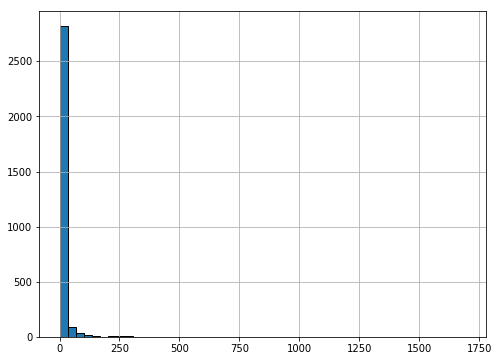

In [41]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
df7['sub_ct'].hist(bins=50)

<Figure size 576x432 with 0 Axes>

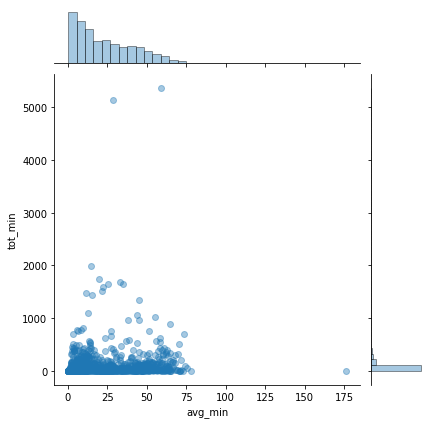

In [21]:
mean_count = 
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
sns.jointplot(x='avg_min', y='tot_min', data=mean_count, alpha=0.4)

In [45]:
days_sub_7 = df7.pivot(index='days_group', columns='title', values='sub_ct')
days_sub_7.head()

title,#1 Clarkson vs. St. Lawrence (W Hockey),#13 Wisconsin vs. Clarkson (M Hockey),#13 Wisconsin vs. St. Lawrence (M Hockey),#14 Michigan vs. Oakland (M Soccer),#18 Virginia Tech vs. Davidson (M Soccer),#21 Fordham vs. Saint Joseph's (M Soccer),#23 Baylor vs. Kansas (W Volleyball),#24 Cornell vs. Harvard (M Soccer),#24 Princeton vs. Cornell (W Soccer),#25 Cornell vs. Brown (M Soccer),...,Yale vs. Cornell (W Volleyball),Yale vs. Dartmouth (Field Hockey),Yale vs. Dartmouth (M Soccer),Yale vs. Dartmouth (W Soccer),Yale vs. Princeton (W Hockey),Yale vs. Quinnipiac (W Hockey),Youngstown State vs. Detroit Mercy (W Soccer),Youngstown State vs. Milwaukee (W Volleyball),Youngstown State vs. South Dakota State (Football),Zebre Rugby Club vs. Edinburgh (Guinness PRO14 Rugby)
days_group,,,,,,,,,,,,,,,,,,,,,
0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10.0,19.0,53.0,10.0,14.0,29.0,10.0,9.0,6.0,5.0,3.0,...,6.0,8.0,7.0,2.0,7.0,3.0,1.0,4.0,58.0,11.0
20.0,NaN,4.0,1.0,NaN,3.0,1.0,NaN,NaN,NaN,1.0,...,NaN,NaN,2.0,NaN,2.0,1.0,NaN,NaN,7.0,NaN
30.0,NaN,3.0,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,18.0,NaN
40.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN


In [108]:
ex1 = days_sub_7['Emporia State vs. #1 Kansas (M Basketball)']

like_ex1 = days_sub_7.corrwith(ex1)

corr_ex1 = pd.DataFrame(like_ex1, columns=['Correlation'])
corr_ex1.dropna(inplace=True)
corr_ex1.head()

C:\Users\NazUremek\Anaconda\lib\site-packages\numpy\lib\function_base.py:2522: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\NazUremek\Anaconda\lib\site-packages\numpy\lib\function_base.py:2451: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,Correlation
title,
#1 Clarkson vs. St. Lawrence (W Hockey),1.000000
#13 Wisconsin vs. Clarkson (M Hockey),0.994830
#13 Wisconsin vs. St. Lawrence (M Hockey),0.994956
#18 Virginia Tech vs. Davidson (M Soccer),0.988177
#21 Fordham vs. Saint Joseph's (M Soccer),1.000000


In [116]:
corr_7_day = pd.merge(corr_ex1, df7, left_on='title', right_on='title', how='inner')
corr_7_day[corr_7_day['sub_ct']>50].sort_values('Correlation', ascending=False).head(20)

,title,Correlation,days_group,sub_ct
637,Emporia State vs. #1 Kansas (M Basketball),1.000000,20.0,55
635,Emporia State vs. #1 Kansas (M Basketball),1.000000,30.0,217
634,Emporia State vs. #1 Kansas (M Basketball),1.000000,10.0,1693
2071,Torino vs. Frosinone (Serie A),1.000000,10.0,53
636,Emporia State vs. #1 Kansas (M Basketball),1.000000,50.0,57
243,Brentford vs. Bristol City (English League Cha...,1.000000,10.0,60
2292,"Wed, 10/24 - In the Crease",0.999999,10.0,100
1569,Ottawa Redblacks vs. Hamilton Tiger-Cats (Cana...,0.999710,10.0,74
2133,Turkey vs. Bosnia-Herzegovina (UEFA Internatio...,0.999695,10.0,68
76,AS Roma vs. SPAL (Serie A),0.999622,10.0,101


### Day 10 Conversion Group

In [52]:
df_10 = """

    SELECT
        title,
        days_group,
        count(subscription_source_ref) AS sub_ct
       
        FROM lm
        WHERE conv_diff = 10
        AND days_group is not null
        
        GROUP BY title, days_group 
        
        ORDER BY sub_ct DESC; """

df10 = (ps.sqldf(df_10, locals()))
df10.head(5)

,title,days_group,sub_ct
0,Emporia State vs. #1 Kansas (M Basketball),10.0,1774
1,Top Rank Boxing on ESPN: Undercards,10.0,849
2,Peyton Manning: Breaking Down Josh Rosen,10.0,700
3,Washington Capitals vs. Pittsburgh Penguins,10.0,542
4,Juventus vs. Genoa (Serie A),10.0,539


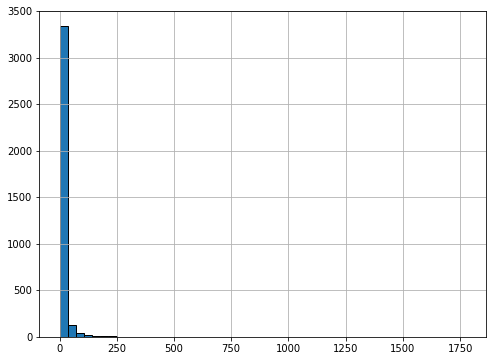

In [53]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
df10['sub_ct'].hist(bins=50)

In [54]:
days_sub_10 = df10.pivot(index='days_group', columns='title', values='sub_ct')
days_sub_10.head()

title,#1 Clarkson vs. St. Lawrence (W Hockey),#13 Wisconsin vs. Clarkson (M Hockey),#13 Wisconsin vs. St. Lawrence (M Hockey),#14 Michigan vs. Oakland (M Soccer),#18 Virginia Tech vs. Davidson (M Soccer),#21 Fordham vs. Saint Joseph's (M Soccer),#23 Baylor vs. Kansas (W Volleyball),#23 Rhode Island vs. Duquesne (M Soccer),#24 Cornell vs. Harvard (M Soccer),#24 Princeton vs. Cornell (W Soccer),...,Yale vs. Dartmouth (M Soccer),Yale vs. Dartmouth (W Soccer),Yale vs. Princeton (W Hockey),Yale vs. Quinnipiac (W Hockey),Youngstown State vs. Detroit Mercy (W Soccer),Youngstown State vs. Green Bay (W Soccer),Youngstown State vs. Green Bay (W Volleyball),Youngstown State vs. Milwaukee (W Volleyball),Youngstown State vs. South Dakota State (Football),Zebre Rugby Club vs. Edinburgh (Guinness PRO14 Rugby)
days_group,,,,,,,,,,,,,,,,,,,,,
0.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10.0,6.0,30.0,5.0,17.0,33.0,9.0,16.0,1.0,5.0,9.0,...,1.0,3.0,2.0,3.0,1.0,7.0,1.0,5.0,78.0,12.0
20.0,NaN,NaN,NaN,NaN,8.0,NaN,5.0,1.0,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,8.0,NaN
30.0,NaN,1.0,NaN,NaN,2.0,1.0,2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,39.0,NaN
40.0,NaN,1.0,1.0,NaN,1.0,NaN,2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN


In [57]:
ex2 = days_sub_10['Emporia State vs. #1 Kansas (M Basketball)']

like_ex2 = days_sub_10.corrwith(ex2)

corr_ex2 = pd.DataFrame(like_ex2, columns=['Correlation'])
corr_ex2.dropna(inplace=True)
corr_ex2.head()

C:\Users\NazUremek\Anaconda\lib\site-packages\numpy\lib\function_base.py:2522: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\NazUremek\Anaconda\lib\site-packages\numpy\lib\function_base.py:2451: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,Correlation
title,
#13 Wisconsin vs. Clarkson (M Hockey),0.985174
#13 Wisconsin vs. St. Lawrence (M Hockey),1.000000
#14 Michigan vs. Oakland (M Soccer),1.000000
#18 Virginia Tech vs. Davidson (M Soccer),0.960173
#21 Fordham vs. Saint Joseph's (M Soccer),1.000000


In [117]:
corr_10_day = pd.merge(corr_ex2, df10, left_on='title', right_on='title', how='inner')
corr_10_day[corr_10_day['sub_ct']>50].sort_values('Correlation', ascending=False).head(20)

,title,Correlation,days_group,sub_ct
798,Emporia State vs. #1 Kansas (M Basketball),1.000000,10.0,1774
799,Emporia State vs. #1 Kansas (M Basketball),1.000000,30.0,317
800,Emporia State vs. #1 Kansas (M Basketball),1.000000,50.0,107
801,Emporia State vs. #1 Kansas (M Basketball),1.000000,20.0,78
1599,"Mon, 10/29 - The Fantasy Show",1.000000,10.0,51
413,Cagliari vs. Bologna (Serie A),0.999610,10.0,117
1334,Latvia vs. Kazakhstan (UEFA Nations League),0.999505,10.0,65
2874,Wales vs. Spain (UEFA International Match),0.999191,10.0,83
2700,Turkey vs. Bosnia-Herzegovina (UEFA Internatio...,0.999080,10.0,62
2081,Preston North End vs. Wigan Athletic (English ...,0.999058,10.0,68


## Correlation between first and second streams and subscriptions

In [62]:
lm2 = pd.merge(lm, df_m, left_on='second_stream_media_id', right_on='mediaid', how='inner')
lm2.head(10)

,subscription_source_ref,swid,sub_random,swid_random,platform,cohort,sku,product_name,signup_date,expiration_date,...,sport_y,titleepisodename_y,hometeamid_y,awayteamid_y,hometeamname_y,awayteamname_y,gamedescription_y,gamedate_est_y,teams_y,contentsource_y
0,GPA.3399-2979-7501-78822,{DF15AAE1-2CB8-40AA-95AA-E12CB8B0AAC5},154,83.0,GOOGLE,ESPN+,com.espn.monthly.espnplus7dft.google,Google ESPN Plus Base Monthly with 7 Day Free ...,10/1/2018,11/1/2018,...,Soccer,Oakland vs. Northern Kentucky (Quarterfinal) (...,NaN,NaN,NaN,NaN,NaN,00:00.0,NaN,espn
1,ta2EDb0A2aHS5pAC8y84SgfAvgOGT934i3NbjgSqpPA=:3:11,{C91B0BA1-FD89-40EC-9E99-06312E47A73B},113,105.0,AMAZON,ESPN+,com.espn.monthly.espnplus7dft.tv.amazon,FireTV ESPN Plus Monthly Base with 7 Day Free ...,10/29/2018,11/5/2018,...,Soccer,Oakland vs. Northern Kentucky (Quarterfinal) (...,NaN,NaN,NaN,NaN,NaN,00:00.0,NaN,espn
2,espn_1c1002a5-2a58-4843-b2d2-d9be6c6fa15f_1540...,{7E7B26D0-35CA-4D8C-A980-47D433FA6ED2},240,180.0,BAMTECH,ESPN+,8.4002E+24,ESPN Plus Monthly Base,10/29/2018,11/7/2018,...,Soccer,Oakland vs. Northern Kentucky (Quarterfinal) (...,NaN,NaN,NaN,NaN,NaN,00:00.0,NaN,espn
3,1.60001E+14,{9A45E304-4B81-46EF-A433-DDA94C1DEBE2},164,167.0,APPLE,ESPN+,com.espn.monthly.espnplus7dft.apple,Apple ESPN Plus Base Monthly with 7 Day Free T...,10/29/2018,11/5/2018,...,Soccer,Oakland vs. Northern Kentucky (Quarterfinal) (...,NaN,NaN,NaN,NaN,NaN,00:00.0,NaN,espn
4,wKFF8kJmiNV9aoGt7UdpuA-B3-RgI3jM0QjLe1uTyv4=:3:11,NaN,159,NaN,AMAZON,ESPN+,com.espn.monthly.espnplus7dft.tablet.amazon,Amazon ESPN Plus Monthly Base with 7 Day Free ...,10/29/2018,11/8/2018,...,Soccer,Oakland vs. Northern Kentucky (Quarterfinal) (...,NaN,NaN,NaN,NaN,NaN,00:00.0,NaN,espn
5,espn_7720b650-3a9e-4287-a8e3-a8d85f217464_1540...,{E79822FB-9251-44F9-B561-75EE711F7D84},87,159.0,BAMTECH,ESPN+,8.4002E+24,ESPN Plus Monthly Base,10/29/2018,2/7/2019,...,Soccer,Oakland vs. Northern Kentucky (Quarterfinal) (...,NaN,NaN,NaN,NaN,NaN,00:00.0,NaN,espn
6,espn_4898009d-4231-4ee6-aa08-ce1e5b280928_1540...,{CA18E9FB-FB89-4F8A-9901-688EC8B3343B},222,101.0,BAMTECH,ESPN+,8.4002E+24,ESPN Plus Monthly Base,10/29/2018,11/7/2018,...,Soccer,Oakland vs. Northern Kentucky (Quarterfinal) (...,NaN,NaN,NaN,NaN,NaN,00:00.0,NaN,espn
7,4.6E+14,NaN,255,NaN,APPLE,ESPN+,com.espn.monthly.espnplusbase.apple,Apple ESPN Plus Base Monthly,10/29/2018,1/29/2019,...,Soccer,Oakland vs. Northern Kentucky (Quarterfinal) (...,NaN,NaN,NaN,NaN,NaN,00:00.0,NaN,espn
8,espn_c3978626-2473-4f8b-8114-8e625ad7a152_1540...,{72E0B184-43DF-46C4-BFC6-D4D8751CA800},249,45.0,BAMTECH,ESPN+,8.4002E+24,ESPN Plus Monthly Base,10/29/2018,11/7/2018,...,Soccer,Oakland vs. Northern Kentucky (Quarterfinal) (...,NaN,NaN,NaN,NaN,NaN,00:00.0,NaN,espn
9,57a922ab-7660-4040-ad28-a98900015f82,{2E3A5996-701A-45BD-BA59-96701AB5BD35},180,215.0,ROKU,ESPN+,com.espn.monthly.espnplus7dft.roku,Roku ESPN Plus Base with 7 day free trial,10/29/2018,11/5/2018,...,Soccer,Oakland vs. Northern Kentucky (Quarterfinal) (...,NaN,NaN,NaN,NaN,NaN,00:00.0,NaN,espn


### Day 7 Conversion Group

In [72]:
df_t7 = """

    SELECT
        title_x as f_title,
        title_y as s_title,
        count(subscription_source_ref) AS sub_ct
       
        FROM lm2
        WHERE conv_diff = 7
        AND days_group is not null
        AND s_title is not null
        
        GROUP BY f_title, s_title  
        
        ORDER BY sub_ct DESC; """

df_titles_7 = (ps.sqldf(df_t7, locals()))
df_titles_7.head(5)

,f_title,s_title,sub_ct
0,Peyton Manning: Breaking Down Josh Rosen,Detail - Peyton Manning: Breaking Down Matthew...,136
1,Spain vs. England (UEFA Nations League),France vs. Germany (UEFA Nations League),135
2,Philadelphia Flyers vs. Boston Bruins,Emporia State vs. #1 Kansas (M Basketball),89
3,North Dakota State vs. Northern Iowa (Football),North Dakota State vs. Western Illinois (Footb...,88
4,Washington Capitals vs. Pittsburgh Penguins,Vegas Golden Knights vs. Pittsburgh Penguins,78


In [119]:
titles_7 = df_titles_7.pivot(index='s_title', columns='f_title', values='sub_ct')
titles_7.head()

f_title,#1 Clarkson vs. St. Lawrence (W Hockey),#13 Wisconsin vs. Clarkson (M Hockey),#13 Wisconsin vs. St. Lawrence (M Hockey),#14 Michigan vs. Oakland (M Soccer),#18 Virginia Tech vs. Davidson (M Soccer),#21 Fordham vs. Saint Joseph's (M Soccer),#23 Baylor vs. Kansas (W Volleyball),#24 Cornell vs. Harvard (M Soccer),#24 Princeton vs. Cornell (W Soccer),#25 Cornell vs. Brown (M Soccer),...,Yale vs. Cornell (W Volleyball),Yale vs. Dartmouth (Field Hockey),Yale vs. Dartmouth (M Soccer),Yale vs. Dartmouth (W Soccer),Yale vs. Princeton (W Hockey),Yale vs. Quinnipiac (W Hockey),Youngstown State vs. Detroit Mercy (W Soccer),Youngstown State vs. Milwaukee (W Volleyball),Youngstown State vs. South Dakota State (Football),Zebre Rugby Club vs. Edinburgh (Guinness PRO14 Rugby)
s_title,,,,,,,,,,,,,,,,,,,,,
#1 Clarkson vs. St. Lawrence (W Hockey),NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
#13 Wisconsin vs. Clarkson (M Hockey),6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
#13 Wisconsin vs. St. Lawrence (M Hockey),NaN,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
#14 Michigan vs. Oakland (M Soccer),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
#18 Virginia Tech vs. Davidson (M Soccer),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [122]:
ex3 = titles_7['Spain vs. England (UEFA Nations League)']

like_ex3 = titles_7.corrwith(ex3)

corr_ex3 = pd.DataFrame(like_ex3, columns=['Correlation'])
corr_ex3.dropna(inplace=True)
corr_ex3.head()

C:\Users\NazUremek\Anaconda\lib\site-packages\numpy\lib\function_base.py:2522: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\NazUremek\Anaconda\lib\site-packages\numpy\lib\function_base.py:2451: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,Correlation
f_title,
10/16 Worlds Cooldown,0.359813
10/20 Cooldown,0.339422
AC Milan vs. Chievo (Serie A),0.395285
AFC Wimbledon vs. Portsmouth (English League One),-0.137361
AS Roma vs. SPAL (Serie A),0.765287


In [125]:
corr_7_titles = pd.merge(corr_ex3, df_titles_7, left_on='f_title', right_on='f_title', how='inner')
corr_7_titles[corr_7_titles['sub_ct']>30].sort_values('Correlation', ascending=False).head(20)

,f_title,Correlation,s_title,sub_ct
381,Brentford vs. Bristol City (English League Cha...,1.000000,Juventus vs. Genoa (Serie A),31
3113,Spain vs. England (UEFA Nations League),1.000000,France vs. Germany (UEFA Nations League),135
2378,New Hampshire vs. Colgate (M Hockey),1.000000,New Hampshire vs. Colgate (M Hockey),36
2237,Netherlands vs. Germany (UEFA Nations League),0.994765,France vs. Germany (UEFA Nations League),48
2238,Netherlands vs. Germany (UEFA Nations League),0.994765,Spain vs. England (UEFA Nations League),32
1322,Fiorentina vs. Cagliari (Serie A),0.773906,Internazionale vs. AC Milan (Serie A),66
3333,Top Rank Boxing on ESPN: Undercards,0.668670,BC Lions vs. Calgary Stampeders (Canadian Foot...,72
2444,North Dakota State vs. Northern Iowa (Football),0.645497,Northern Iowa vs. South Dakota (Football),33
2443,North Dakota State vs. Northern Iowa (Football),0.645497,North Dakota State vs. Western Illinois (Footb...,88
1392,France vs. Germany (UEFA Nations League),0.599898,Belgium vs. Netherlands (UEFA International Ma...,63


### Day 10 Conversion Group

In [137]:
df_t10 = """

    SELECT
        title_x as f_title,
        title_y as s_title,
        count(subscription_source_ref) AS sub_ct
       
        FROM lm2
        WHERE conv_diff = 10
        AND days_group is not null
        AND s_title is not null
        
        GROUP BY f_title, s_title  
        
        ORDER BY sub_ct DESC; """

df_titles_10 = (ps.sqldf(df_t10, locals()))
df_titles_10.head(5)

,f_title,s_title,sub_ct
0,Peyton Manning: Breaking Down Josh Rosen,Detail - Peyton Manning: Breaking Down Matthew...,165
1,Juventus vs. Genoa (Serie A),Empoli vs. Juventus (Serie A),153
2,Spain vs. England (UEFA Nations League),France vs. Germany (UEFA Nations League),134
3,Washington Capitals vs. Pittsburgh Penguins,Vegas Golden Knights vs. Pittsburgh Penguins,129
4,Top Rank Boxing on ESPN: Undercards,BC Lions vs. Calgary Stampeders (Canadian Foot...,125


In [138]:
titles_10 = df_titles_10.pivot(index='s_title', columns='f_title', values='sub_ct')
titles_10.head()

f_title,#1 Clarkson vs. St. Lawrence (W Hockey),#13 Wisconsin vs. Clarkson (M Hockey),#13 Wisconsin vs. St. Lawrence (M Hockey),#14 Michigan vs. Oakland (M Soccer),#18 Virginia Tech vs. Davidson (M Soccer),#21 Fordham vs. Saint Joseph's (M Soccer),#23 Baylor vs. Kansas (W Volleyball),#23 Rhode Island vs. Duquesne (M Soccer),#24 Cornell vs. Harvard (M Soccer),#24 Princeton vs. Cornell (W Soccer),...,Yale vs. Dartmouth (M Soccer),Yale vs. Dartmouth (W Soccer),Yale vs. Princeton (W Hockey),Yale vs. Quinnipiac (W Hockey),Youngstown State vs. Detroit Mercy (W Soccer),Youngstown State vs. Green Bay (W Soccer),Youngstown State vs. Green Bay (W Volleyball),Youngstown State vs. Milwaukee (W Volleyball),Youngstown State vs. South Dakota State (Football),Zebre Rugby Club vs. Edinburgh (Guinness PRO14 Rugby)
s_title,,,,,,,,,,,,,,,,,,,,,
#1 Clarkson vs. St. Lawrence (W Hockey),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
#13 Wisconsin vs. Clarkson (M Hockey),1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
#13 Wisconsin vs. St. Lawrence (M Hockey),2.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
#14 Michigan vs. Oakland (M Soccer),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
#18 Virginia Tech vs. Davidson (M Soccer),NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [139]:
ex4 = titles_10['Peyton Manning: Breaking Down Josh Rosen']

like_ex4 = titles_10.corrwith(ex4)

corr_ex4 = pd.DataFrame(like_ex4, columns=['Correlation'])
corr_ex4.dropna(inplace=True)
corr_ex4.head()

C:\Users\NazUremek\Anaconda\lib\site-packages\numpy\lib\function_base.py:2522: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\NazUremek\Anaconda\lib\site-packages\numpy\lib\function_base.py:2451: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,Correlation
f_title,
#13 Wisconsin vs. Clarkson (M Hockey),0.535480
#13 Wisconsin vs. St. Lawrence (M Hockey),1.000000
#18 Virginia Tech vs. Davidson (M Soccer),-0.330556
#4 Ohio State vs. #10 St. Lawrence (W Hockey),-0.500000
10/17 Worlds Cooldown,-0.146128


In [140]:
corr_10_titles = pd.merge(corr_ex4, df_titles_10, left_on='f_title', right_on='f_title', how='inner')
corr_10_titles[corr_10_titles['sub_ct']>30].sort_values('Correlation', ascending=False).head(20)

,f_title,Correlation,s_title,sub_ct
4727,Peyton Manning: Breaking Down Josh Rosen,1.000000,Detail - Peyton Manning: Breaking Down Matthew...,165
5026,Poland vs. Portugal (UEFA Nations League),0.943880,France vs. Iceland (UEFA International Match),33
6832,Vegas Golden Knights vs. Pittsburgh Penguins,0.905395,Winnipeg Jets vs. Nashville Predators,55
6831,Vegas Golden Knights vs. Pittsburgh Penguins,0.905395,Pittsburgh Penguins vs. Toronto Maple Leafs,56
3703,"Mon, 10/8 - The Fantasy Show: Yates worried ab...",0.654654,"Tue, 10/9 - The Fantasy Show: Who can replace ...",34
136,AS Roma vs. SPAL (Serie A),0.563257,Juventus vs. Genoa (Serie A),49
2371,Florida Panthers vs. Washington Capitals,0.375496,Countdown to Craziness,40
2766,Illinois State vs. North Dakota State (Football),0.300807,North Dakota State vs. South Dakota (Football),55
2448,France vs. Germany (UEFA Nations League),0.239577,Belgium vs. Netherlands (UEFA International Ma...,57
4952,Pittsburgh Penguins vs. Toronto Maple Leafs,0.169878,Pittsburgh Penguins vs. Edmonton Oilers,47


## Correlation between first and second stream sports and subscriptions

### Day 7 Conversion Group

In [101]:
df_s7 = """

    SELECT
        sport_x as f_sport,
        sport_y as s_sport,
        count(subscription_source_ref) AS sub_ct
       
        FROM lm2
        WHERE conv_diff = 7
        AND f_sport is not null
        AND s_sport is not null
        
        GROUP BY f_sport, s_sport 
        
        ORDER BY sub_ct DESC; """

df_sports_7 = (ps.sqldf(df_s7, locals()))
df_sports_7.head(5)

,f_sport,s_sport,sub_ct
0,Soccer,Soccer,4928
1,Football,Football,3232
2,Soccer,Football,1083
3,Football,Soccer,829
4,Hockey,Hockey,768


In [131]:
sports_7 = df_sports_7.pivot(index='s_sport', columns='f_sport', values='sub_ct')
sports_7.head()

f_sport,Auto Racing,Basketball,Boxing,Field Hockey,Football,Hockey,Ice Hockey,Lacrosse,Mixed Martial Arts,Rugby,Soccer,Tennis,Track and Field,Volleyball,Water Polo
s_sport,,,,,,,,,,,,,,,
Auto Racing,1.0,1.0,NaN,1.0,5.0,NaN,2.0,NaN,NaN,1.0,4.0,NaN,NaN,1.0,NaN
Basketball,NaN,105.0,5.0,10.0,70.0,174.0,63.0,1.0,1.0,4.0,120.0,6.0,1.0,44.0,NaN
Boxing,NaN,3.0,221.0,2.0,147.0,62.0,7.0,NaN,7.0,1.0,144.0,6.0,NaN,6.0,1.0
Field Hockey,NaN,21.0,3.0,57.0,28.0,7.0,11.0,NaN,1.0,2.0,84.0,3.0,6.0,8.0,1.0
Football,4.0,51.0,169.0,35.0,3232.0,379.0,106.0,1.0,35.0,22.0,1083.0,28.0,3.0,83.0,9.0


In [132]:
ex5 = sports_7['Soccer']

like_ex5 = sports_7.corrwith(ex5)

corr_ex5 = pd.DataFrame(like_ex5, columns=['Correlation'])
corr_ex5.dropna(inplace=True)
corr_ex5.head()

,Correlation
f_sport,
Auto Racing,-0.074152
Basketball,0.597398
Boxing,0.419377
Field Hockey,0.695660
Football,0.359065


In [134]:
corr_7_sport = pd.merge(corr_ex5, df_sports_7, left_on='f_sport', right_on='f_sport', how='inner')
corr_7_sport[corr_7_sport['sub_ct']>100].sort_values('Correlation', ascending=False).head(20)

,f_sport,Correlation,s_sport,sub_ct
117,Soccer,1.000000,Rugby,101
116,Soccer,1.000000,Basketball,120
115,Soccer,1.000000,Boxing,144
114,Soccer,1.000000,Volleyball,166
113,Soccer,1.000000,Ice Hockey,189
112,Soccer,1.000000,Hockey,438
111,Soccer,1.000000,Football,1083
110,Soccer,1.000000,Soccer,4928
6,Basketball,0.597398,Hockey,141
8,Basketball,0.597398,Basketball,105


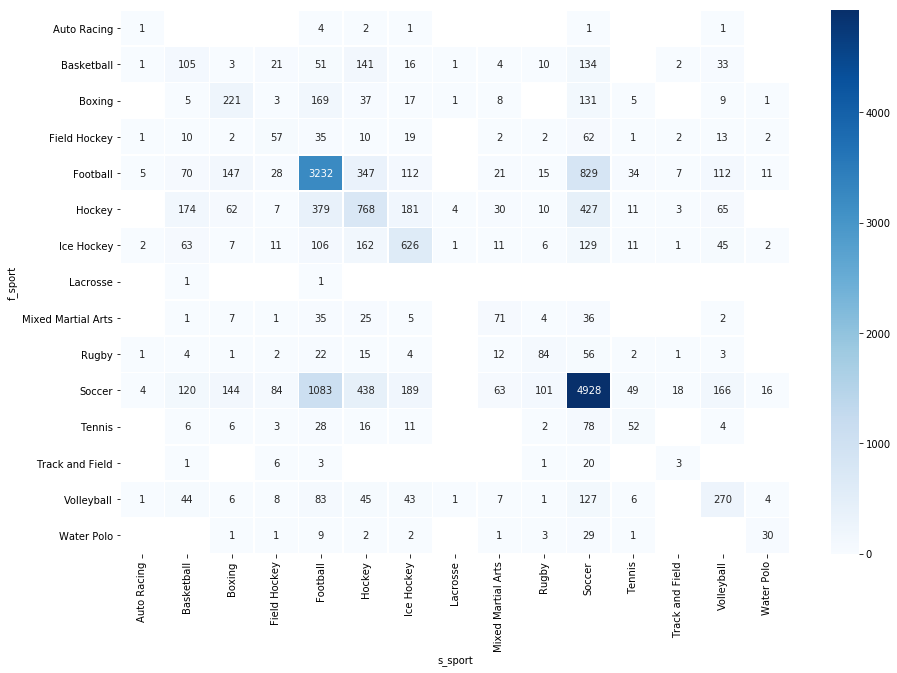

In [105]:
fig, ax = plt.subplots(figsize=(15,10)) 
ax = sns.heatmap(sports_7, annot=True, linewidths=.5, cmap='Blues', fmt='g')

### Day 10 Conversion Group

In [141]:
df_s10 = """

    SELECT
        sport_x as f_sport,
        sport_y as s_sport,
        count(subscription_source_ref) AS sub_ct
       
        FROM lm2
        WHERE conv_diff = 10
        AND f_sport is not null
        AND s_sport is not null
        
        GROUP BY f_sport, s_sport 
        
        ORDER BY sub_ct DESC; """

df_sports_10 = (ps.sqldf(df_s10, locals()))
df_sports_10.head(5)

,f_sport,s_sport,sub_ct
0,Soccer,Soccer,6636
1,Football,Football,5095
2,Hockey,Hockey,1852
3,Soccer,Football,1212
4,Football,Soccer,1161


In [142]:
sports_10 = df_sports_10.pivot(index='s_sport', columns='f_sport', values='sub_ct')
sports_10.head()

f_sport,Auto Racing,Basketball,Boxing,Field Hockey,Football,Hockey,Ice Hockey,Lacrosse,Mixed Martial Arts,Rugby,Soccer,Tennis,Track and Field,Volleyball,Water Polo
s_sport,,,,,,,,,,,,,,,
Auto Racing,5.0,1.0,2.0,NaN,4.0,1.0,1.0,NaN,NaN,3.0,13.0,NaN,NaN,1.0,NaN
Basketball,NaN,97.0,14.0,16.0,78.0,179.0,26.0,NaN,4.0,1.0,115.0,18.0,NaN,41.0,NaN
Boxing,NaN,4.0,772.0,4.0,236.0,117.0,14.0,NaN,33.0,3.0,268.0,13.0,NaN,13.0,9.0
Field Hockey,NaN,13.0,NaN,36.0,38.0,16.0,3.0,NaN,4.0,3.0,98.0,2.0,9.0,14.0,NaN
Football,1.0,92.0,283.0,39.0,5095.0,593.0,104.0,NaN,78.0,27.0,1212.0,31.0,5.0,137.0,15.0


In [143]:
ex6 = sports_10['Soccer']

like_ex6 = sports_10.corrwith(ex6)

corr_ex6 = pd.DataFrame(like_ex6, columns=['Correlation'])
corr_ex6.dropna(inplace=True)
corr_ex6.head()

,Correlation
f_sport,
Auto Racing,0.812959
Basketball,0.589443
Boxing,0.335522
Field Hockey,0.668384
Football,0.297018


In [145]:
corr_10_sport = pd.merge(corr_ex6, df_sports_10, left_on='f_sport', right_on='f_sport', how='inner')
corr_10_sport[corr_10_sport['sub_ct']>100].sort_values('Correlation', ascending=False).head(20)

,f_sport,Correlation,s_sport,sub_ct
121,Soccer,1.000000,Tennis,102
120,Soccer,1.000000,Rugby,104
119,Soccer,1.000000,Basketball,115
118,Soccer,1.000000,Mixed Martial Arts,164
117,Soccer,1.000000,Ice Hockey,164
116,Soccer,1.000000,Volleyball,257
115,Soccer,1.000000,Boxing,268
114,Soccer,1.000000,Hockey,760
113,Soccer,1.000000,Football,1212
112,Soccer,1.000000,Soccer,6636


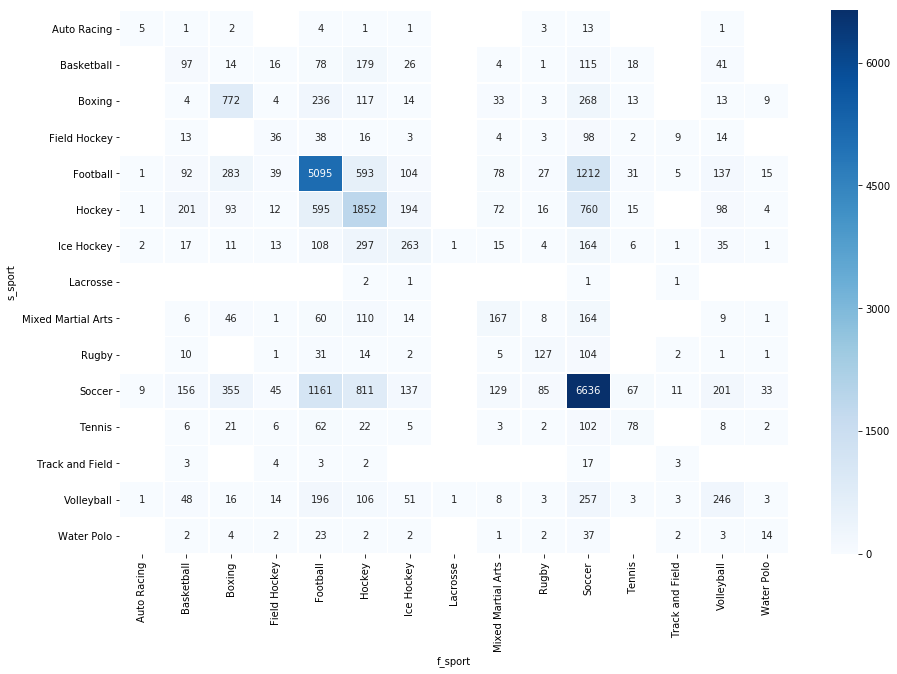

In [146]:
fig, ax = plt.subplots(figsize=(15,10)) 
ax = sns.heatmap(sports_10, annot=True, linewidths=.5, cmap='Blues', fmt='g')